In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('D:/linh tinh/hoc may/data/updated_ev_data.csv')


df.head()

,Vehicle ID,Charger ID,Date,Charging Time,Average Power,Max Power,Total Energy Delivered,SOC Charged
0,EV016-EV021,CH001,2019-08-02,0.033333,9.6,9.6,0.32,9.250089
1,EV016-EV021,CH001,2019-08-02,0.116667,9.6,9.6,1.12,9.518109
2,EV016-EV021,CH001,2019-08-02,1.166667,9.6,9.6,11.21,12.897276
3,EV016-EV021,CH001,2019-08-02,0.300000,9.6,9.6,2.88,10.107752
4,EV016-EV021,CH001,2019-08-01,0.116667,9.6,9.6,1.12,9.518109


In [3]:
df.describe()

,Charging Time,Average Power,Max Power,Total Energy Delivered,SOC Charged
count,16761.000000,16761.000000,13468.000000,16761.000000,16761.000000
mean,2.141066,115.802869,181.795997,48.256784,30.517540
std,3.522936,119.060010,154.326431,73.964054,20.446253
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.100000,9.600000,9.600000,8.326000,12.500000
50%,0.200000,34.062347,237.340000,23.190000,28.500000
75%,2.793889,237.992000,337.480000,34.559000,41.500000
max,23.606667,367.304000,383.140000,490.838986,145.500000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16761 entries, 0 to 16760
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Vehicle ID              16761 non-null  object 
 1   Charger ID              16761 non-null  object 
 2   Date                    16761 non-null  object 
 3   Charging Time           16761 non-null  float64
 4   Average Power           16761 non-null  float64
 5   Max Power               13468 non-null  float64
 6   Total Energy Delivered  16761 non-null  float64
 7   SOC Charged             16761 non-null  float64
dtypes: float64(5), object(3)
memory usage: 1.0+ MB


In [5]:
df.shape

(16761, 8)

In [6]:
df.columns

Index(['Vehicle ID', 'Charger ID', 'Date', 'Charging Time', 'Average Power',
       'Max Power', 'Total Energy Delivered', 'SOC Charged'],
      dtype='object')

In [7]:
df.isnull().sum()

Vehicle ID                   0
Charger ID                   0
Date                         0
Charging Time                0
Average Power                0
Max Power                 3293
Total Energy Delivered       0
SOC Charged                  0
dtype: int64

In [8]:
df.nunique()

Vehicle ID                   30
Charger ID                    8
Date                       1547
Charging Time              5232
Average Power             11994
Max Power                  5641
Total Energy Delivered    12153
SOC Charged                3137
dtype: int64

In [9]:
# Chuyển cột 'Date' thành kiểu datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%y', errors='coerce')


# Kiểm tra kiểu dữ liệu
print(df.dtypes)

# Kiểm tra xem có giá trị thiếu không
print(df.isnull().sum())


Vehicle ID                        object
Charger ID                        object
Date                      datetime64[ns]
Charging Time                    float64
Average Power                    float64
Max Power                        float64
Total Energy Delivered           float64
SOC Charged                      float64
dtype: object
Vehicle ID                    0
Charger ID                    0
Date                      15524
Charging Time                 0
Average Power                 0
Max Power                  3293
Total Energy Delivered        0
SOC Charged                   0
dtype: int64


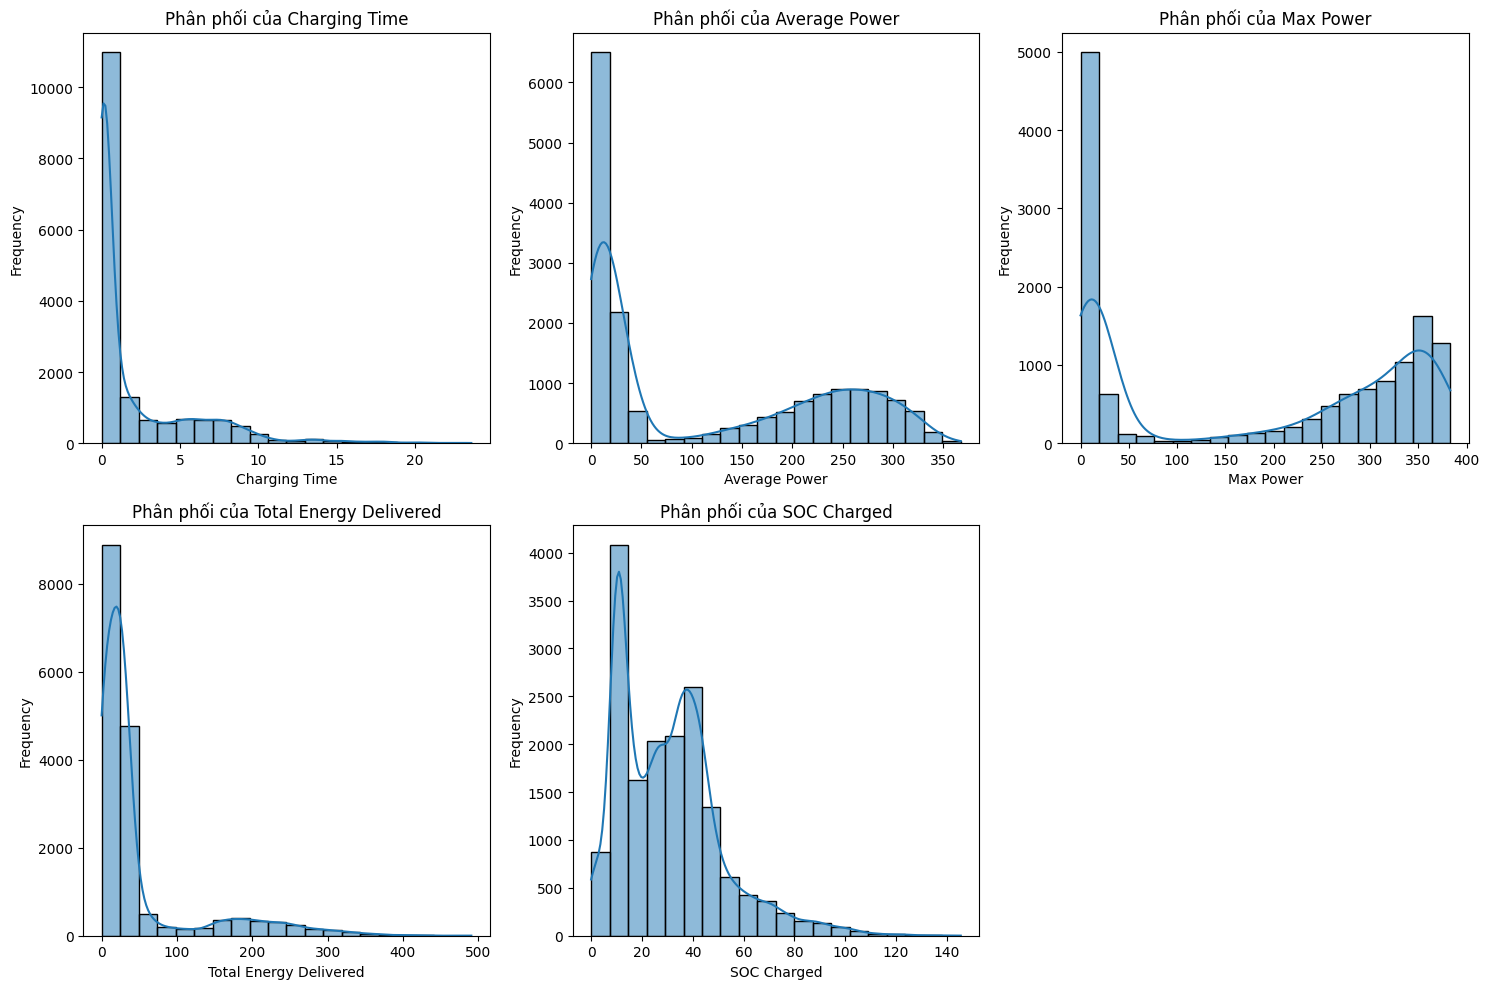

In [10]:
# Vẽ biểu đồ histogram cho tất cả các biến số
df_numeric = df.select_dtypes(include=['float64', 'int64'])  # Lọc các cột số

plt.figure(figsize=(15, 10))
for i, column in enumerate(df_numeric.columns, 1):
    plt.subplot(2, 3, i)  # Vẽ biểu đồ theo dạng grid 2x3
    sns.histplot(df[column], kde=True, bins=20)
    plt.title(f'Phân phối của {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()  # Căn chỉnh các biểu đồ
plt.show()


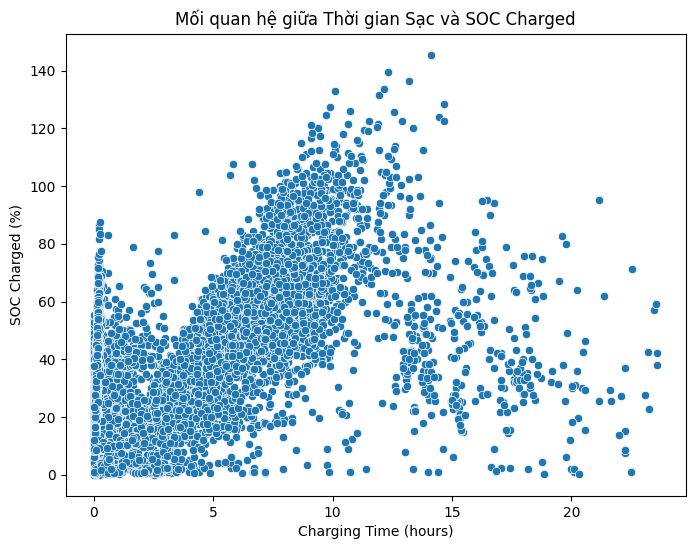

In [11]:
# Vẽ biểu đồ tán xạ giữa 'Charging Time' và 'SOC Charged'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Charging Time', y='SOC Charged', data=df)
plt.title('Mối quan hệ giữa Thời gian Sạc và SOC Charged')
plt.xlabel('Charging Time (hours)')
plt.ylabel('SOC Charged (%)')
plt.show()


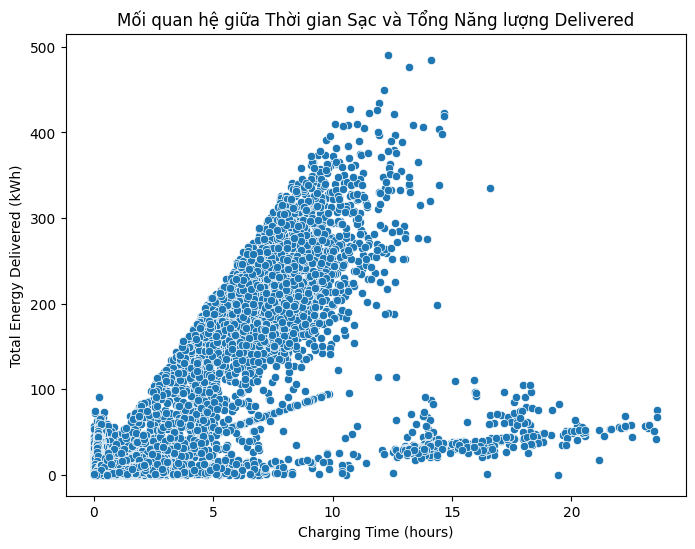

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Charging Time', y='Total Energy Delivered', data=df)
plt.title('Mối quan hệ giữa Thời gian Sạc và Tổng Năng lượng Delivered')
plt.xlabel('Charging Time (hours)')
plt.ylabel('Total Energy Delivered (kWh)')
plt.show()


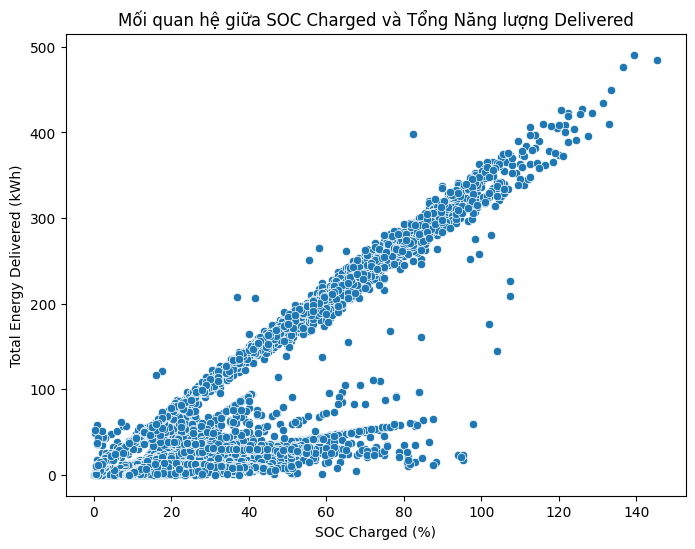

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='SOC Charged', y='Total Energy Delivered', data=df)
plt.title('Mối quan hệ giữa SOC Charged và Tổng Năng lượng Delivered')
plt.xlabel('SOC Charged (%)')
plt.ylabel('Total Energy Delivered (kWh)')
plt.show()


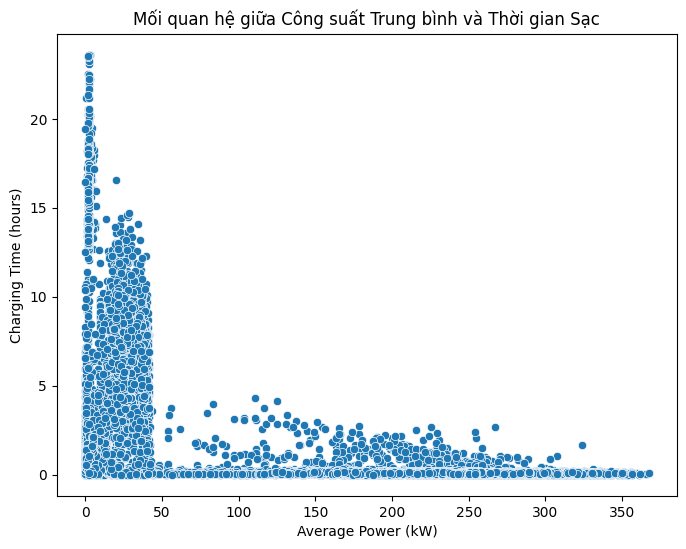

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Average Power', y='Charging Time', data=df)
plt.title('Mối quan hệ giữa Công suất Trung bình và Thời gian Sạc')
plt.xlabel('Average Power (kW)')
plt.ylabel('Charging Time (hours)')
plt.show()


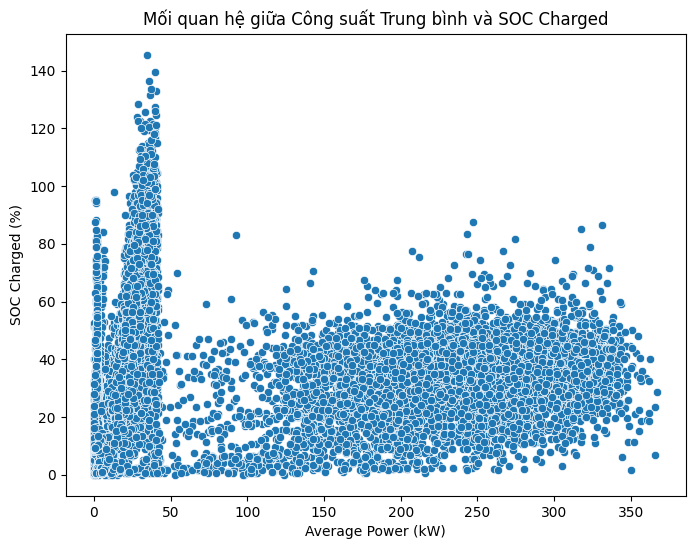

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Average Power', y='SOC Charged', data=df)
plt.title('Mối quan hệ giữa Công suất Trung bình và SOC Charged')
plt.xlabel('Average Power (kW)')
plt.ylabel('SOC Charged (%)')
plt.show()


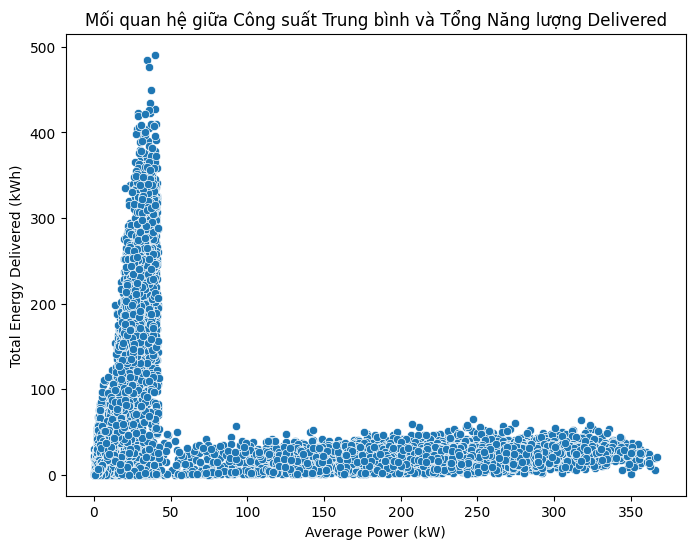

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Average Power', y='Total Energy Delivered', data=df)
plt.title('Mối quan hệ giữa Công suất Trung bình và Tổng Năng lượng Delivered')
plt.xlabel('Average Power (kW)')
plt.ylabel('Total Energy Delivered (kWh)')
plt.show()


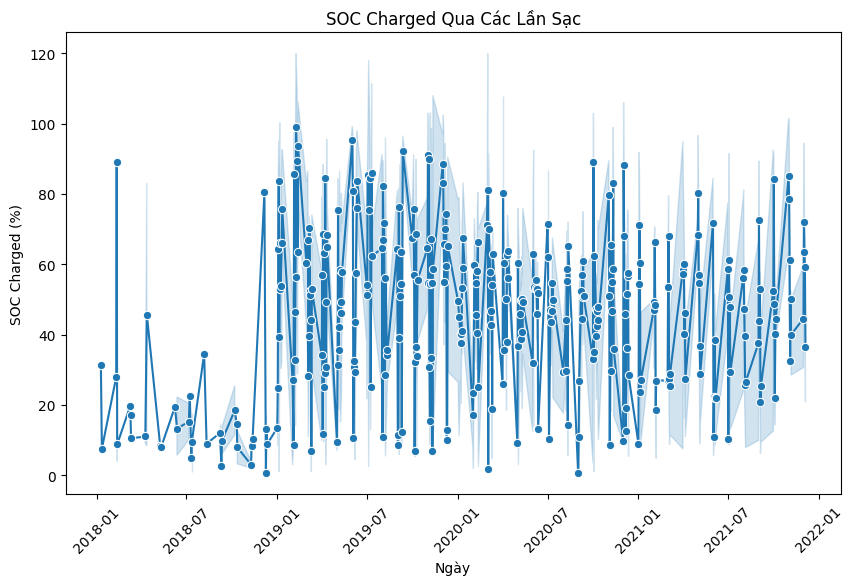

In [17]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='SOC Charged', data=df, marker='o')
plt.title('SOC Charged Qua Các Lần Sạc')
plt.xlabel('Ngày')
plt.ylabel('SOC Charged (%)')
plt.xticks(rotation=45)
plt.show()
